# Thera Bank Card Users Churn Prediction
### Project 5
Aditya Ohrie

## Background Information
Thera Bank has recently found an increased level of customer attrition in their credit card products. Being an important revenue stream for the bank in terms of fees and interest payments, a study has been initiated to better understand reasons for attrition and to create a model that accurately predicts customer attrition.


## Objectives
1. Identify key customer demographics and behavior
2. Create an accurate model that predicts customer attrition using past customer data
3. Propose key business recomendations to reduce customer attrition

## Contents
1. Installing Python Packages
2. Dataset Exploration
3. Feature Exploration
4. Exploratory Data Analysis
5. Bivariate Feature Analysis and Relationship Exploration
6. Data Pre-processing and Feature Engineering
7. Model Evaluation Criterion
8. Model Building and Evaluation
9. Oversampling and Model Fitting
10. Undersampling and Model Fitting
11. Hyperparameter Tuning
12. Key Takeaways and Actionable Insights

## Installing Python Packages

In [1]:
import numpy as np # NUMPY is a package for numerical and arthematic operators
import pandas as pd # PANDAS helps with dataframe creation, editing and analysis
import matplotlib.pyplot as plt # MATPLOTLIB is a data vizualization package to create a multitude of graphs
import seaborn as sns # SEABORN is an extremely powerful vizualization tool that sits on top of MATPLOTLIB 
sns.set(color_codes=True) # Adds color palletes to graphs to make interpretation easier
%matplotlib inline 
# setting matplotlib graphs to be shown in the notebook rather than just be saved as objects
import warnings
warnings.filterwarnings('ignore')# hiding all warnings
pd.set_option('display.max_columns', None) # Allows us to see all columns of the dataset during exploration
pd.set_option('display.max_rows', 200) #Setting this allows us to see the first two hundred rows of the dataset
df = pd.read_csv("BankChurners.csv", index_col=0) # uploading the dataset and storing it as df
from sklearn.linear_model import LinearRegression #allows us to run linear regressions
from sklearn.model_selection import train_test_split # allows us to rendomly split data into train and test groups
from sklearn.metrics import mean_absolute_error#allows us to quickly find the mean absolute error
from sklearn.metrics import mean_squared_error#allows us to quickly find the mean squared error

In [3]:
from sklearn.cluster import KMeans
k = KMeans(n_clusters = 3)
a = k.fit_transform(df)
print(a)

ValueError: could not convert string to float: 'Existing Customer'

## Dataset Exploration

### Dataset Shape

In [2]:
df.shape#gives shape of dataset

(10127, 20)

**Observations**
1. There are 10127 unique customer observations
2. There are 20 features

### Sample Data

In [3]:
np.random.seed(646)
df.sample(n=5)#picks five rows at random

Attrition_Flag  Customer_Age Gender  Dependent_count  \
CLIENTNUM                                                            
721438233  Existing Customer            39      M                2   
827114058  Existing Customer            46      M                4   
812501358  Existing Customer            46      F                4   
712438308  Existing Customer            27      F                1   
718943508  Existing Customer            42      M                3   

          Education_Level Marital_Status Income_Category Card_Category  \
CLIENTNUM                                                                
721438233   Post-Graduate         Single     $40K - $60K          Blue   
827114058   Post-Graduate        Married     $60K - $80K          Blue   
812501358   Post-Graduate       Divorced  Less than $40K          Blue   
712438308     High School        Married             abc          Blue   
718943508             NaN         Single    $80K - $120K          Blue   

           Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
CLIENTNUM                                                                     
721438233              31                         6                       3   
827114058              42                         6                       2   
812501358              41                         4                       1   
712438308              15                         2                       1   
718943508              33                         3                       3   

           Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
CLIENTNUM                                                             
721438233                      3        3297.0                 1761   
827114058                      1       11634.0                    0   
812501358                      1        1752.0                  611   
712438308                      2        7469.0                    0   
718943508                      2        3714.0                 2170   

           Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  \
CLIENTNUM                                                           
721438233           1536.0                 0.879            15580   
827114058          11634.0                 0.520             4447   
812501358           1141.0                 0.465             4864   
712438308           7469.0                 0.688            16730   
718943508           1544.0                 0.524             1454   

           Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
CLIENTNUM                                                              
721438233             120                0.739                  0.534  
827114058              74                0.574                  0.000  
812501358              76                0.462                  0.349  
712438308             122                0.718                  0.000  
718943508              35                0.522                  0.584

**Observations**
1. ClientNum seems to be the unique ID given to each customer
2. There are missing values in the dataset that must be imputed using the appropriate method
3. There seem to be 6 categorical and 13 numeric features

### Feature Exploration

**Feature Descriptions**

|Feature|Description|
|---:|---:|
|**Attrition_Flag**|Whether the customer is attrited or existing|           
|**Customer_Age**|Age of customer|            
|**Gender**|Gender of Customer
|**Dependent_count**|Number of dependents for each customer      
|**Education_Level**|Customer Education Level
|**Marital_Status**|Customer's Marital Status
|**Income_Category**|Customer's Income bracket
|**Card_Category**|Type of card held by customer
|**Months_on_book**|Length of customer relationship                
|**Total_Relationship_Count**|Number of products availed by the customer
|**Months_Inactive_12_mon**|How many months has the customer been inactive in the last 12 months
|**Contacts_Count_12_mon**|How many times has the customer been contacted by the bank in the last 12 months|
|**Credit_Limit**|Credit Limit issued to customer in USD|
|**Total_Revolving_Bal**|Total credit balance carried buy customer|
|**Avg_Open_To_Buy**|Average Credit available to customer
|**Total_Amt_Chng_Q4_Q1**|Change in customer spending between Q4 and Q1|
|**Total_Trans_Amt**|Total Transaction amount for customer in the last 12 months| 
|**Total_Trans_Ct**|Total number of Transactions by customer in the last 12 months|
|**Total_Ct_Chng_Q4_Q1**|Change in number of transactions performed by customer in Q4 compared to Q1|
|**Avg_Utilization_Ratio**|Customer Average Utilization Ratio

Let us take a quick look at the feature types

In [4]:
df.dtypes#returns feature types for all features

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

**Observations**
1. As we noted above, there are 6 categorical features and 13 numeric features

### Check for Missing Values

In [5]:
df.isnull().sum().sort_values(ascending=False)#sums missing values by column and reports results in descending order

Education_Level             1519
Marital_Status               749
Attrition_Flag                 0
Contacts_Count_12_mon          0
Total_Ct_Chng_Q4_Q1            0
Total_Trans_Ct                 0
Total_Trans_Amt                0
Total_Amt_Chng_Q4_Q1           0
Avg_Open_To_Buy                0
Total_Revolving_Bal            0
Credit_Limit                   0
Months_Inactive_12_mon         0
Customer_Age                   0
Total_Relationship_Count       0
Months_on_book                 0
Card_Category                  0
Income_Category                0
Dependent_count                0
Gender                         0
Avg_Utilization_Ratio          0
dtype: int64

**Observations**
1. Both Education Level and Marital Status have missing values and must be imputed
2. As they are categorical Variables, we will impute these values with Mode or most frequent observations.

## Explatory Data Analysis

### Summary Statistics

In [6]:
df.describe().T#shows summary statistics of all numeric features in a transposed manner

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

**Observations**
1. The median age of a customer is 46 which corresponds with the median dependents being 2. This implies that the average customer has children
2. The median credit limit for a customer is 4549USD. While the maximum is 34516USD we cannot treat it as an outlier as it is the credit limit given by the bank to a high income customer
3. On average customers spend 25% less in Q4 compared to Q1
4. The average customer spends about 4404USD a year on their Thera Bank cards
5. The median credit utilization ratio for Thera Bank customers is 17.6%
6. The media revolving Balance is 1276USD. This implies a large number of customers do not pay their credit card bills in full.

#### Defining function to plot boxplots and Histograms

In [7]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):#defining function for histogram and boxplot in one figure
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="green"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="red"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="orange", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Univariate Analysis

#### Customer Age

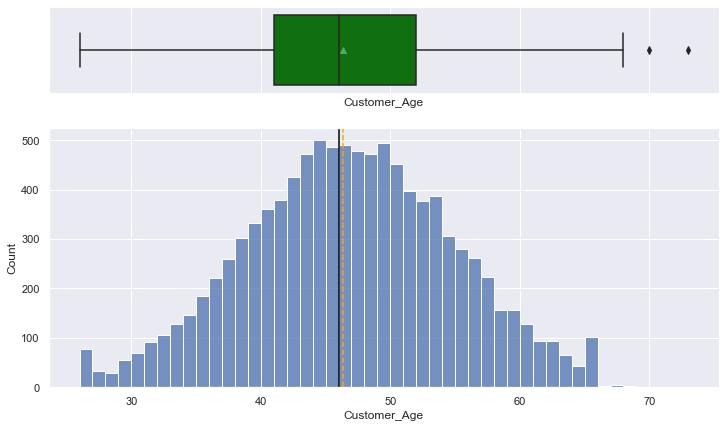

In [8]:
histogram_boxplot(df, "Customer_Age")

**Observations**
1. Both the median and mean customer age are significantly close to each other hovering around the 46 year mark
2. Customer age is reasonably normaly distributed lying generally between the range of 25-65 years old

#### Months on Book

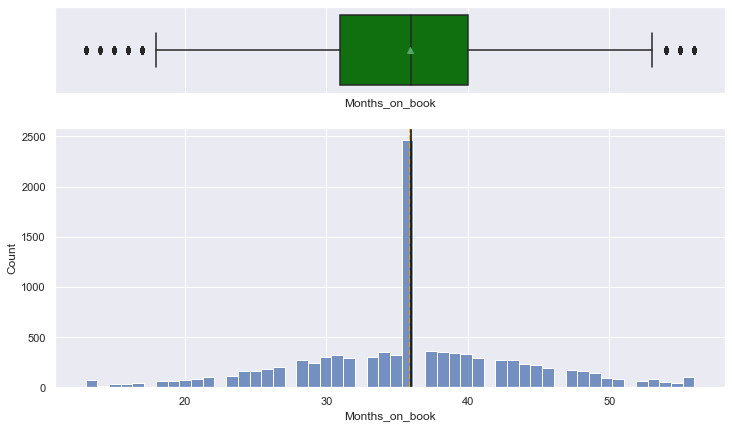

In [9]:
histogram_boxplot(df, "Months_on_book")

**Observations**
1. Around 50% of customers have been with the bank for less than three years.
2. The ditribution is fairly normally distributed with the most significant peak at the 36 month mark

#### Credit Limit

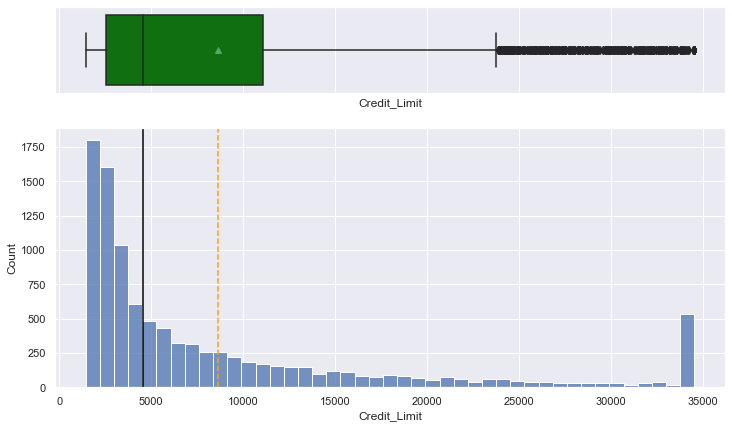

In [10]:
histogram_boxplot(df, "Credit_Limit")

1. This distribution has a definite right skew
2. While the median credit limit is around 4500USD, the mean credit limit extends to apprximately 8500USD
3. There is a significant peak around the 32000USD mark which could be explained by the existence of a premium product offered to High Net Worth Individuals

#### Revolving Balance

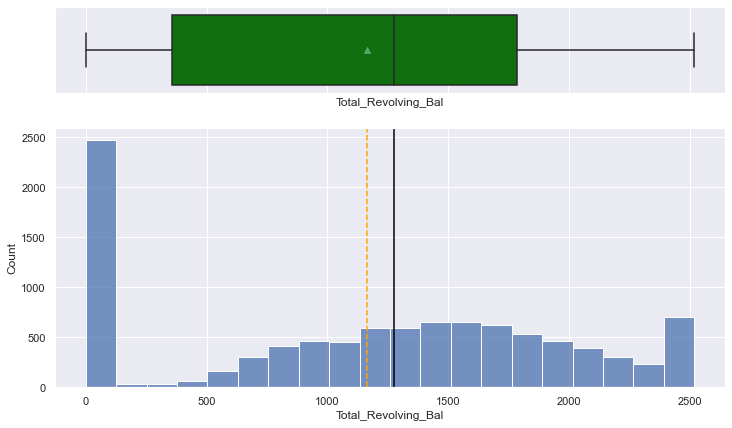

In [11]:
histogram_boxplot(df, "Total_Revolving_Bal")

**Observations**
1. The average revolving debt for customers is around 1150USD while the median hovers around 1250USD.
2. Almost a quarter of all Thera Bank customers choose to pay their bills fully and mantain a 0 balance

#### Q4 vs. Q1 Spending

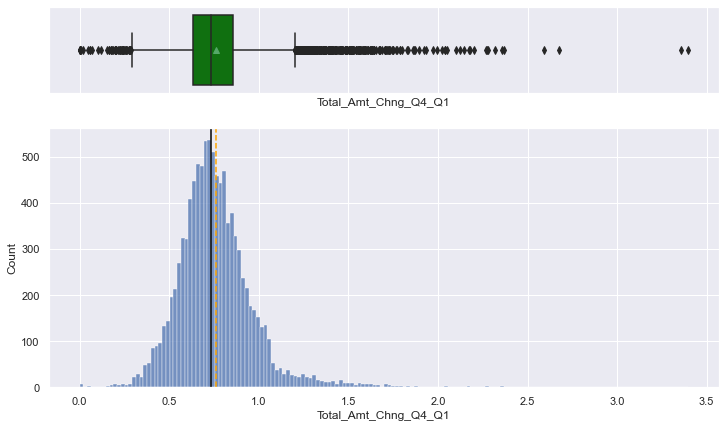

In [12]:
histogram_boxplot(df, "Total_Amt_Chng_Q4_Q1")

**Observations**
1. On average customers only spent 75% of their Q1 spending in Q4
2. The bank should consider running seasonal schemes during lower purchase periods such as higher reward bonuses and extra cashback schemes

#### Total Transaction Amount

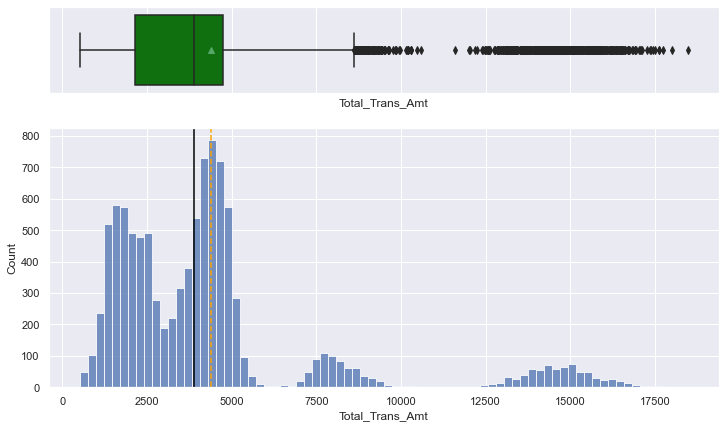

In [13]:
histogram_boxplot(df, "Total_Trans_Amt")

1. The distribution has a definite right skew
2. While the boxplot shows convention outliers outside the maximum, the density and frequency of these observations make it imposssible for us to apply any kind of outlier treatment to them

#### Number of Transactions

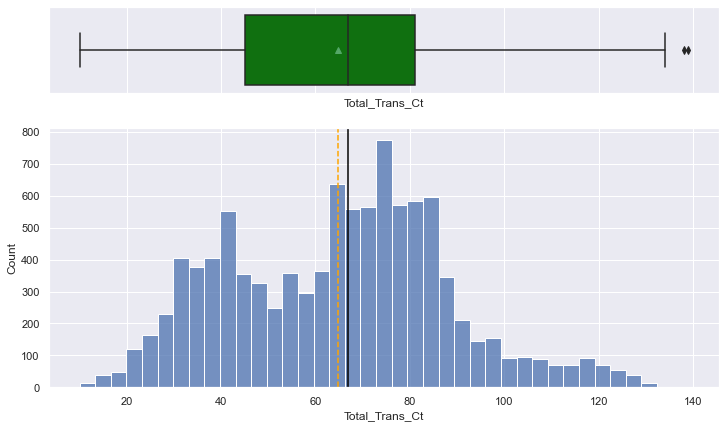

In [14]:
histogram_boxplot(df, "Total_Trans_Ct")

**Observations**
1. The average customer transacts approximately 65 times in a calendar year
2. The distribution has a right skew which corressponds with those users that have a total higher transaction amount

#### Q4 vs. Q1 Transactions

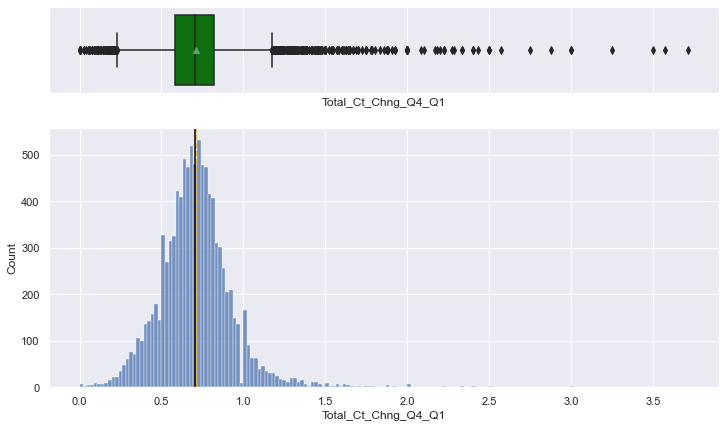

In [15]:
histogram_boxplot(df, "Total_Ct_Chng_Q4_Q1")

**Observations**
1. Similar to Transaction amounts, users only initiated about 75% transactions in Q4 when converted to Q1
2. This implies that in general there is a average transaction amount for customers and the bank should impliment programs to boost these transactions

#### Utilization Ratio

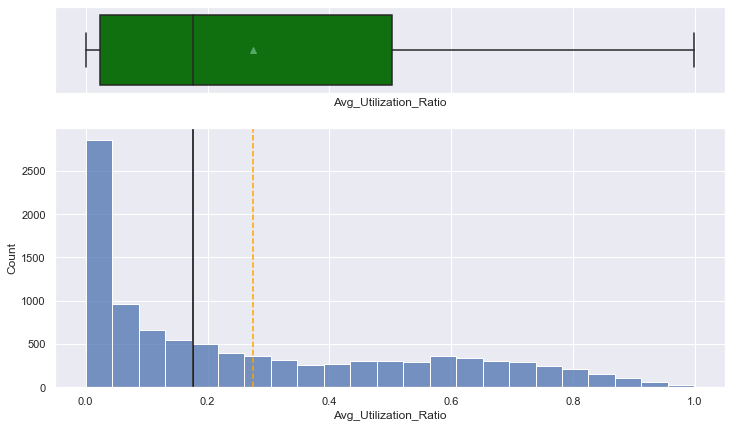

In [16]:
histogram_boxplot(df, "Avg_Utilization_Ratio")

**Observations**
1. More than 50% of clients tend to keep their credit utilization below the 20% mark
2. This data has a definite right skew
3. This feature lends itself to bias as attrited customers will have a credit utilization of 0

### Bivariate Feature Analysis and Relationship Exploration

#### Pair Plot

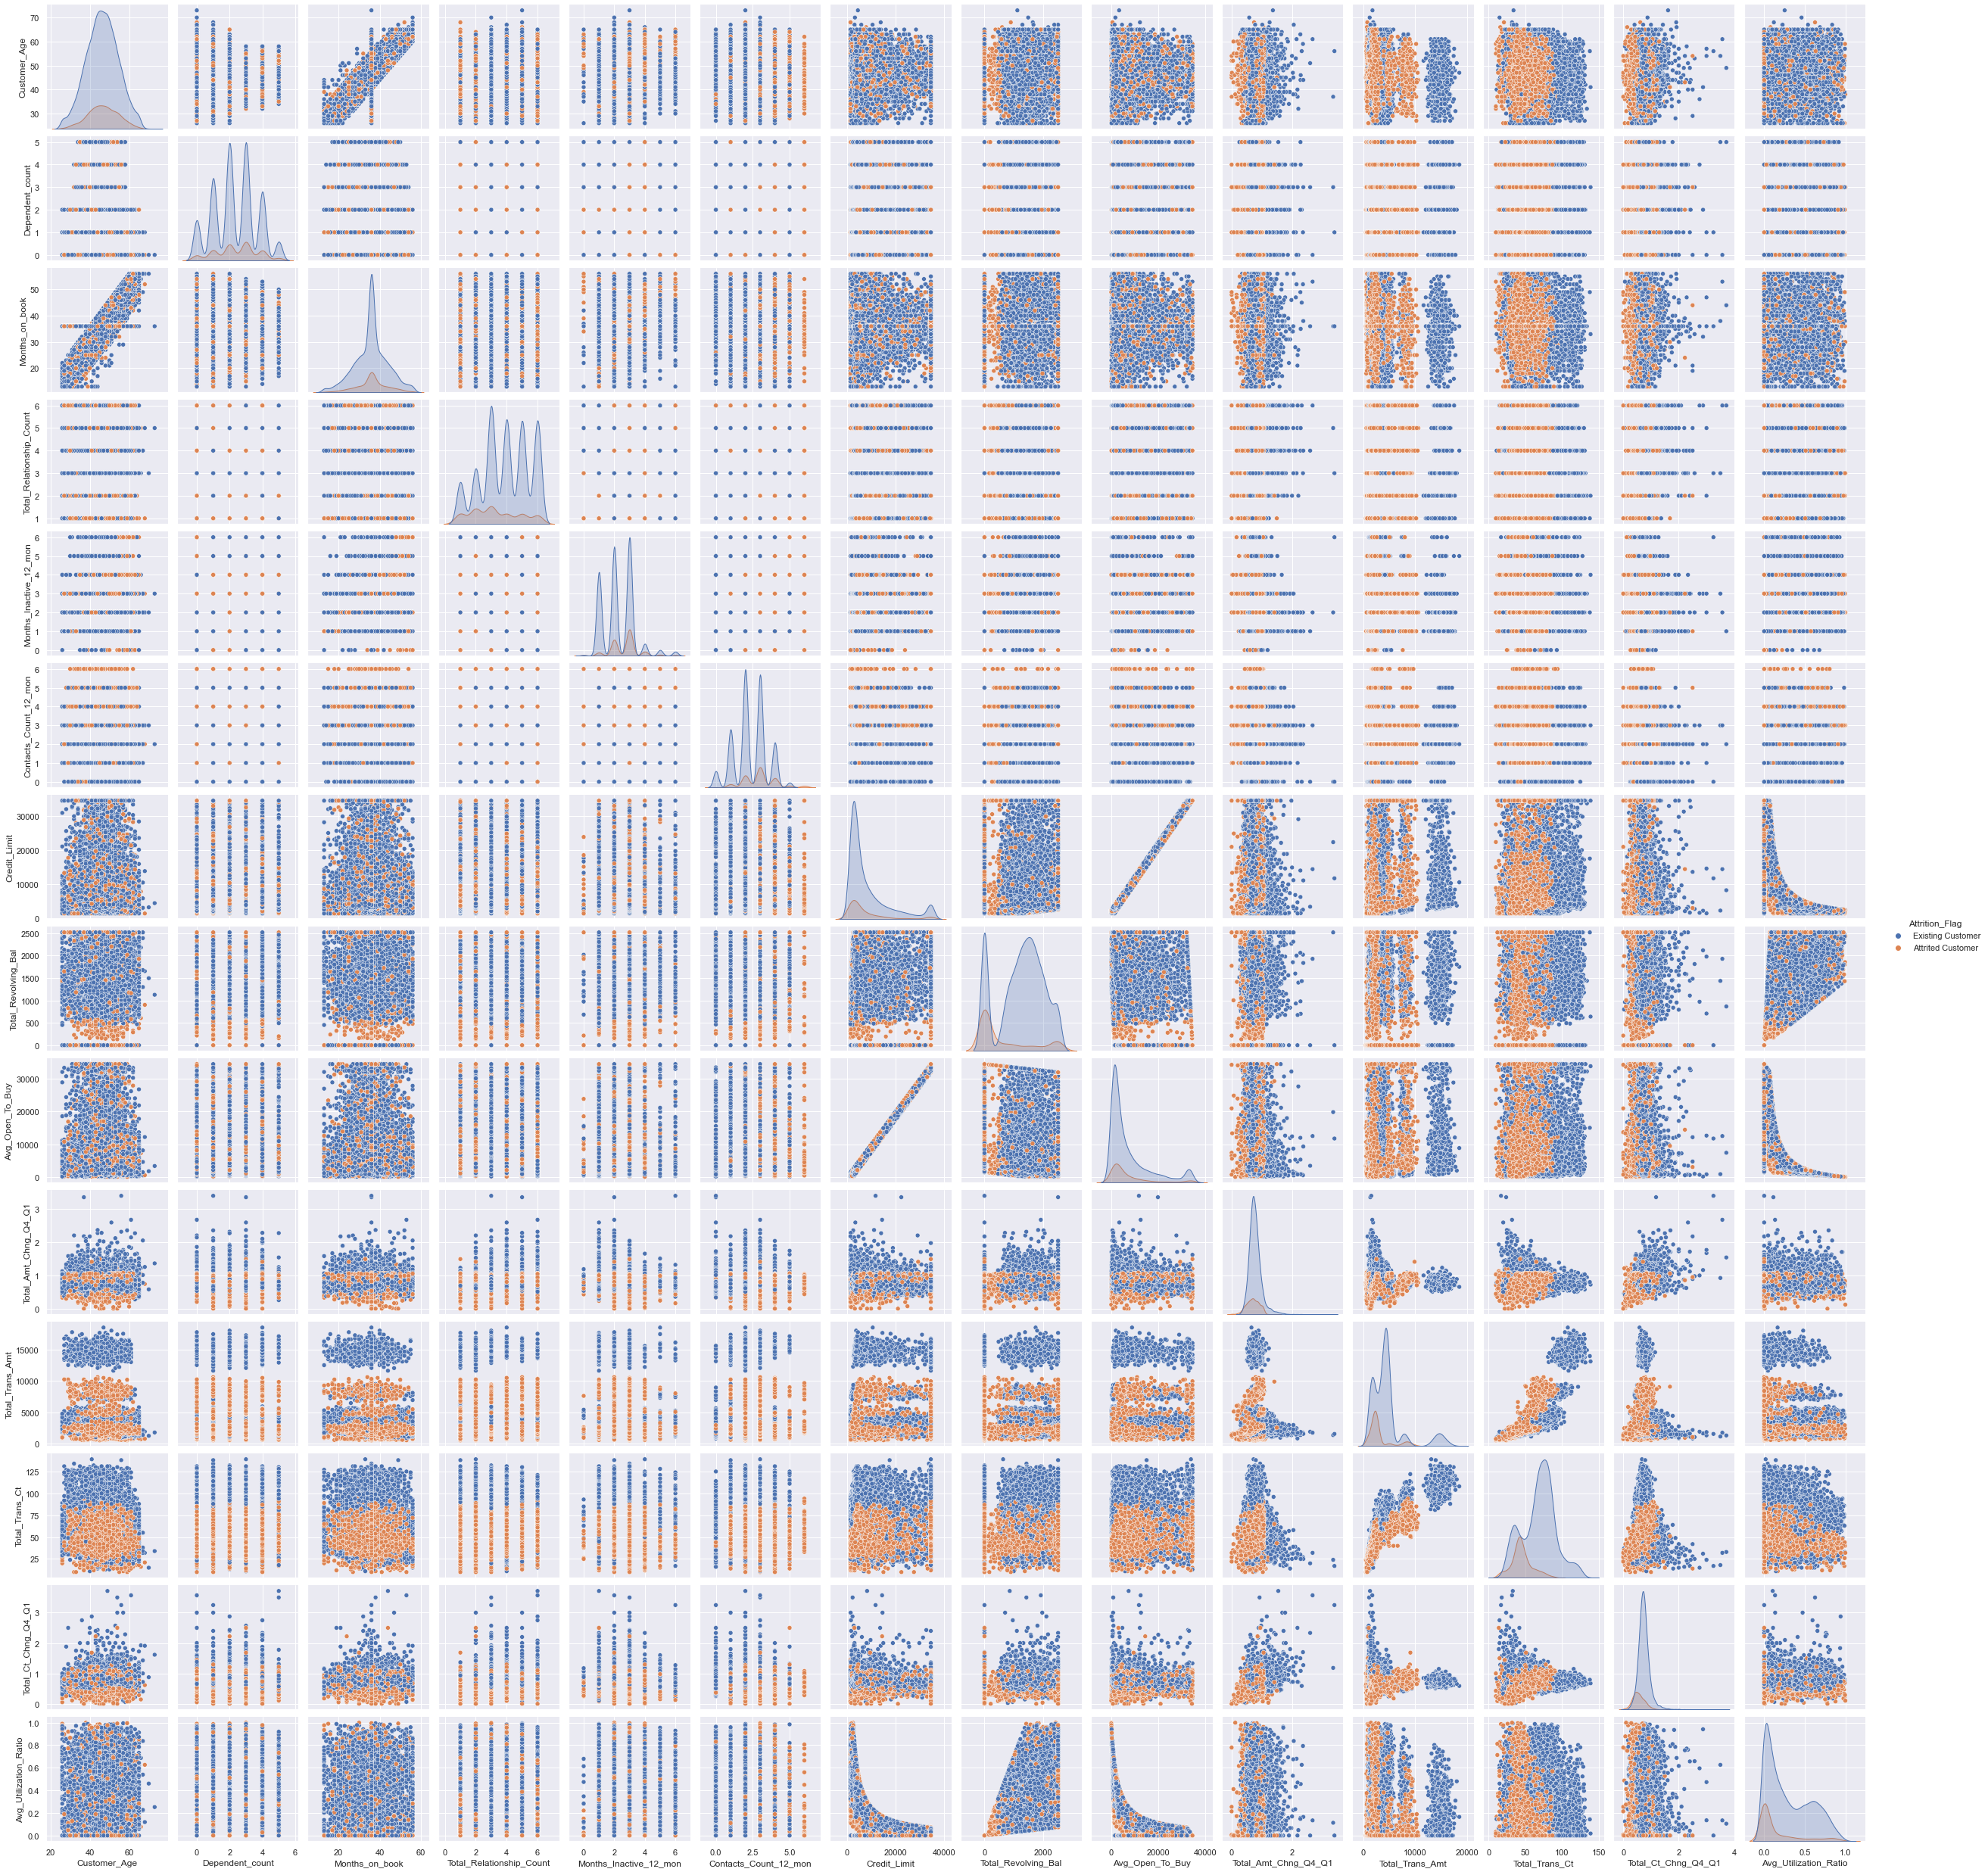

In [17]:
sns.pairplot(data=df,hue="Attrition_Flag")#convieniently creates histograms and scatterplots for each pair of numeric features

**Observations**
1. Credit Limit and Average Openess to buy are almost perfectly correlated and hence one of these variables must be dropped
2. Total Transaction Count and Total Transaction amount are significantly correlated as predicted.
3. In the above scatterplot of Total Transaction Amount and Total transaction count, observations with large values for both features have almost no instance of attrition.Hence the bank must implement programs to keep transactions up

Let us quickly take a look at the distribution of attrited vs. existing customers

<AxesSubplot:xlabel='Attrition_Flag', ylabel='count'>

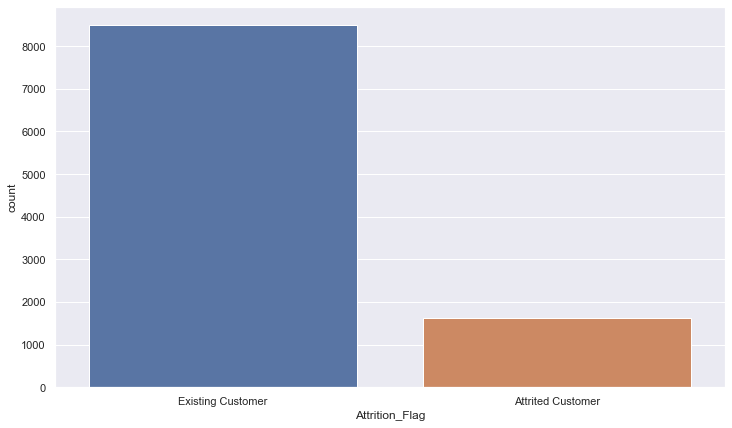

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x="Attrition_Flag")

Attrited customers make up roughly **14%** of all observations.

Let us continue looking at categorical variables based on customer attrition

#### Gender and Customer Attrition

<AxesSubplot:xlabel='Gender', ylabel='count'>

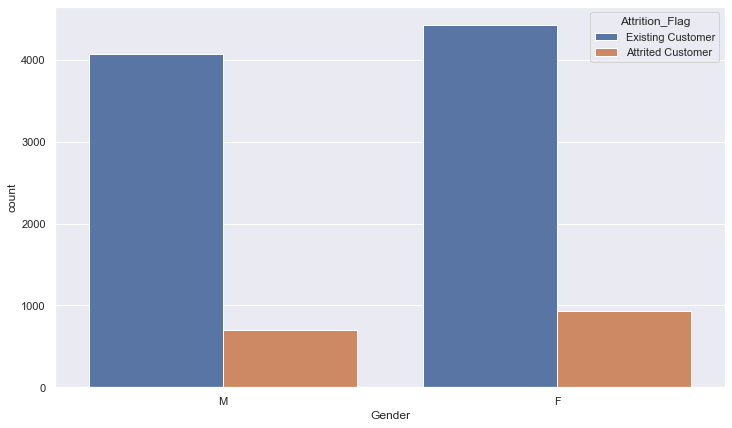

In [19]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x="Gender",hue="Attrition_Flag")

**Observations**
1. Women make up the majority of customers at Thera Bank.
2. The rate of attrition looks to be slightly higher in men than women

#### Marital Status and Customer Attrition

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

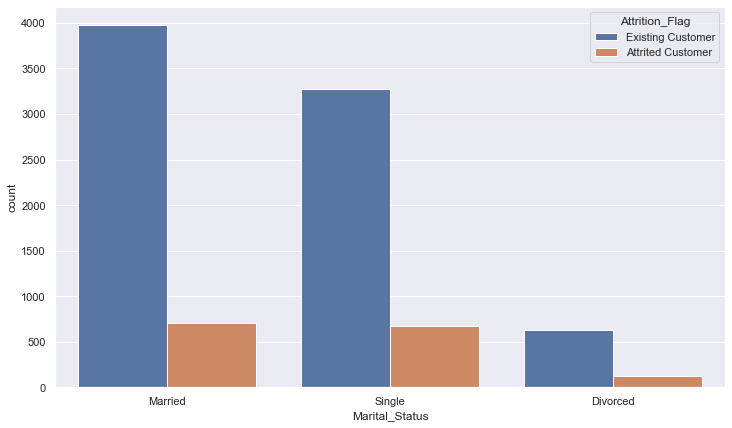

In [20]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x="Marital_Status",hue="Attrition_Flag")

**Observations**
1. Almost half the customers are married followed by a large number of Single customers
2. There does not seem to be a clear indicator whether a particular marital status leads to larger attrition

#### Education Level and Customer Attrition

<AxesSubplot:xlabel='Education_Level', ylabel='count'>

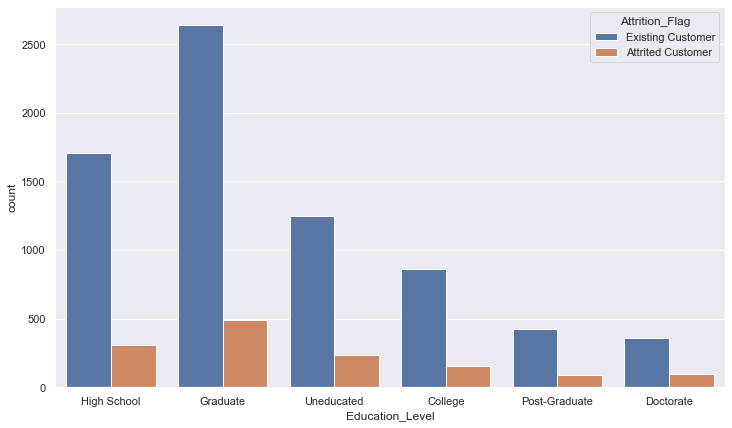

In [21]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x="Education_Level",hue="Attrition_Flag")

**Observations**
1. The most common education levels for Thera Bank customers are Graduate, High School and Uneducated respectively
2. Individuals with doctorate degrees seem to have higher attrition rates when compared to the rest of the customer base

#### Income Category and Customer Attrition

<AxesSubplot:xlabel='Income_Category', ylabel='count'>

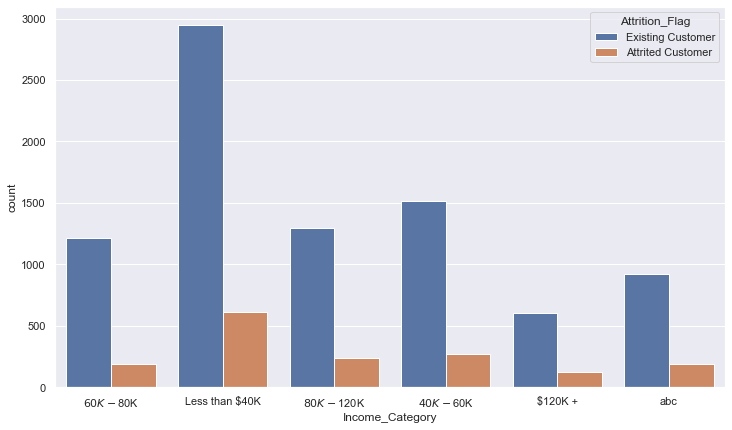

In [22]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x="Income_Category",hue="Attrition_Flag")

**Observation**
1. Almost a third of customers earn less than 40kUSD a year which is well bellow the US median income of 60kUSD
2. There are about a 1000 wrongly entered observations which must be imputed by the most common catgeory

#### Card Category and Customer Attrition

<AxesSubplot:xlabel='Card_Category', ylabel='count'>

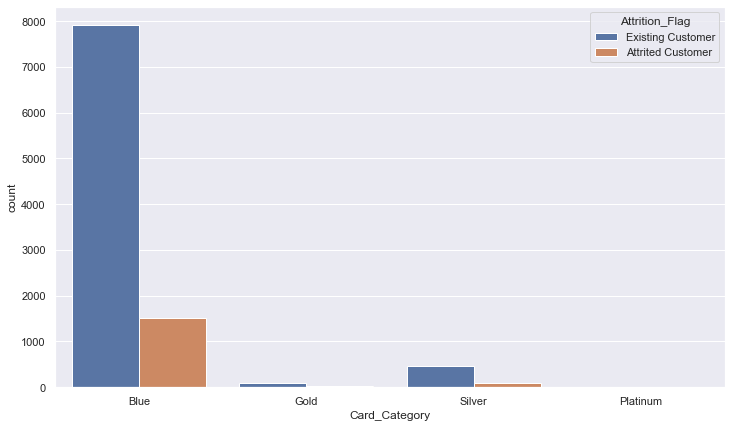

In [23]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x="Card_Category",hue="Attrition_Flag")

**Observations**
1. The blue card seems to be the most popular card and is most likely a beginner card
2. The low numbers of higher tiered cards seems to imply that Thera Bank is a credit building bank used by lower income customers
3. The tiers corresponding to the frequency in ascending order seem to be Blue, Silver, Gold and Platinum

#### Total Relationship Count and Customer Attrition

<AxesSubplot:xlabel='Total_Relationship_Count', ylabel='count'>

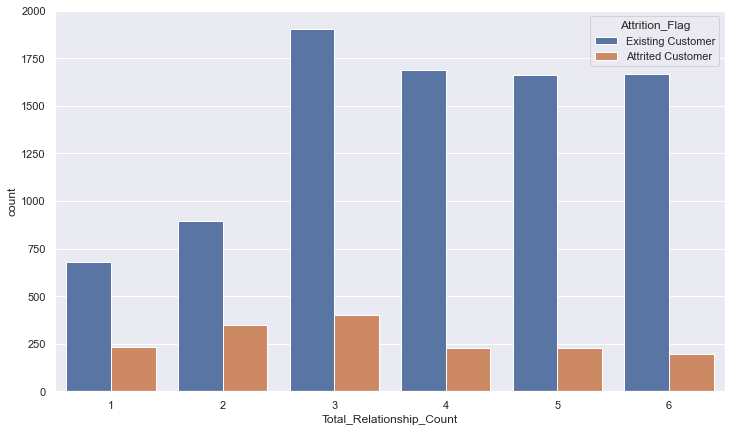

In [24]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x="Total_Relationship_Count",hue="Attrition_Flag")

**Observations**
1. Most customers have 3 or more relationships in the bank in terms of different cards and account types
2. Customer attrition seems to be higher for customers with less than 3 accounts.
3. This is consistent with a customer less likely to cut ties with increased dependency on banking services

#### Credit Limit vs. Utilization Ration

<AxesSubplot:xlabel='Credit_Limit', ylabel='Avg_Utilization_Ratio'>

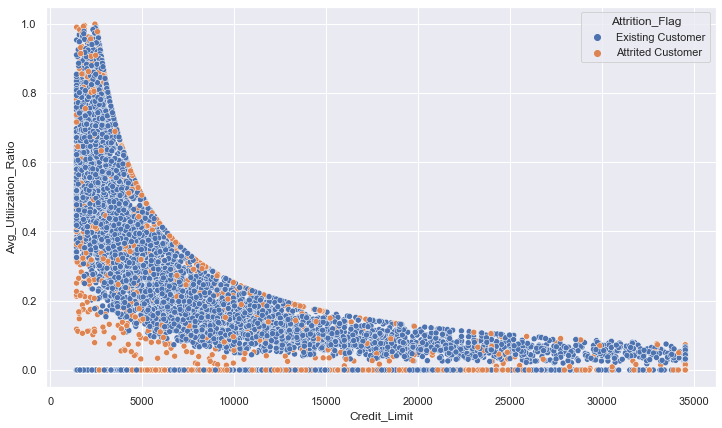

In [25]:
plt.figure(figsize=(12,7))
sns.scatterplot(data=df,x="Credit_Limit",y="Avg_Utilization_Ratio",hue="Attrition_Flag")

**Observations**
1. There is a clear negative corellation between Credit Limit and Utilization Ratio
2. This implies those with a lower credit limit carry a higher utilization rate
3. A major decision making factor when it comes to lending decision is a customer's credit score. An important factor in credit scores is credit utilization
4. Hence the bank should impliment credit education programs which would lead to higher customer satisfaction and retention

#### Utilization Ratio and Customer Attrition

<AxesSubplot:xlabel='Avg_Utilization_Ratio', ylabel='Attrition_Flag'>

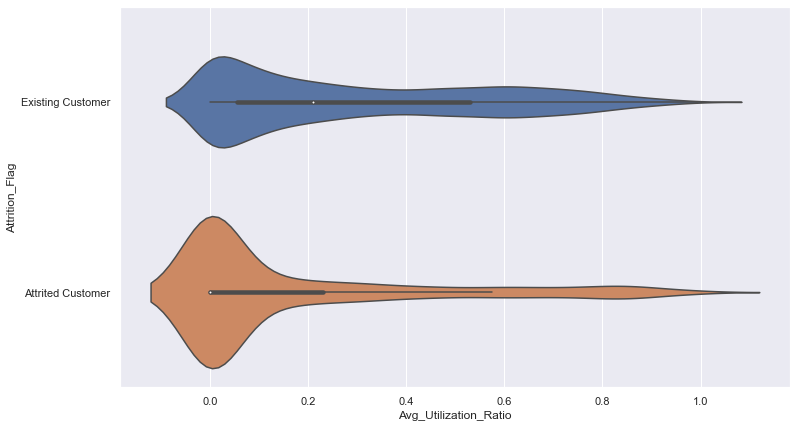

In [26]:
plt.figure(figsize=(12,7))
sns.violinplot(data=df,x="Avg_Utilization_Ratio",y="Attrition_Flag")

**Observations**
1. More attrited customers seem to have a 0 utilization rate which is consistent as most would pay off balances before closing an account
2. Some attrited customers still have a positive credit utilization ratio implying they closed their account before settling balances
3. A significant number of existing customers tend to keep their average utiilization low

#### Credit Limit vs. Months Inactive

<AxesSubplot:xlabel='Months_Inactive_12_mon', ylabel='Credit_Limit'>

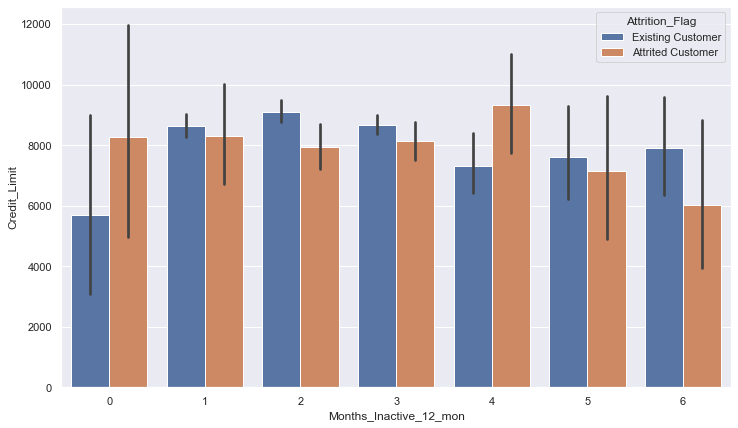

In [27]:
plt.figure(figsize=(12,7))
sns.barplot(y = 'Credit_Limit', x = 'Months_Inactive_12_mon', data = df, hue = "Attrition_Flag")

**Observations**
1. In general, attrited customers seem to have lower credit limits than existing customers
2. To reduce attrition, the bank could increase customer credit limits within the risk tolerance carried by the bank

#### Times Contacted in Last 12 Months and Customer Attrition

<AxesSubplot:xlabel='Contacts_Count_12_mon', ylabel='count'>

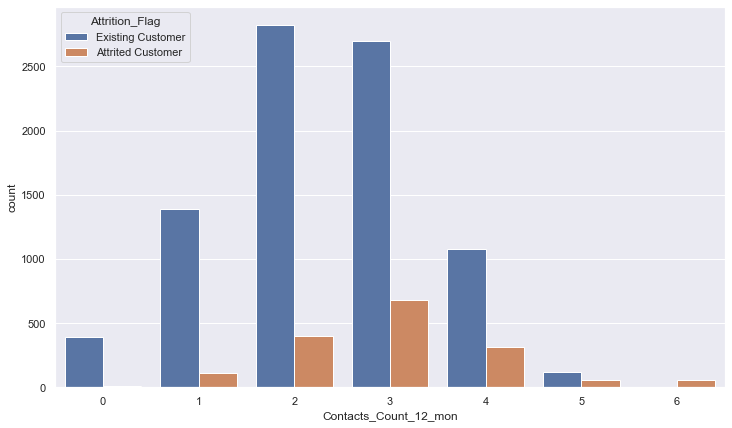

In [28]:
plt.figure(figsize=(12,7))
sns.countplot(data=df,x="Contacts_Count_12_mon",hue="Attrition_Flag")

**Observations**
1. Most customer attrition seems to occur in costumers contacted 3 or more times in the last 12 months
2. The bank must implement more proactive strategies than just contacting inactive customers as it shows little effect 

#### Marital Status vs. Utilization Ratio wrt. Card Category

<AxesSubplot:xlabel='Marital_Status', ylabel='Avg_Utilization_Ratio'>

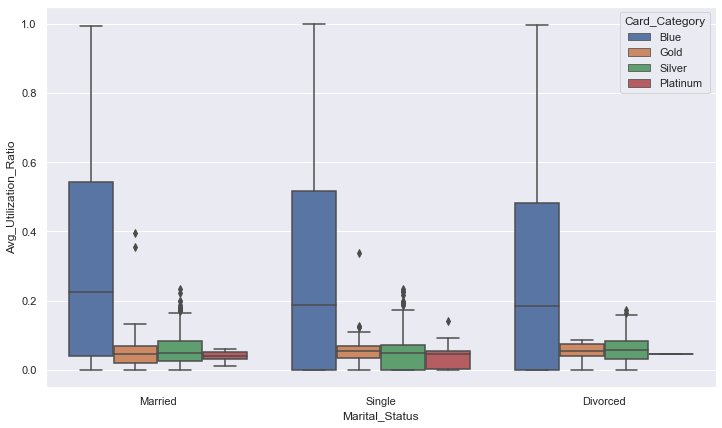

In [29]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df,x="Marital_Status",y="Avg_Utilization_Ratio",hue="Card_Category")

**Observations**
1. Regardless of Marital Status, Blue Card members seem to have the highest credit utilization ratios. As we assumed before, if the blue card is the lowest level card with the lowest credit limit, even small amounts of utilization would show up as a higher ratio
2. Single Individuals with higher tiered cards seem to have the lowest utilization ratios
3. Within the Blue Card, married customers have the highest utilization, followed by Single customers and lastly divorced customers
4. Almost no divorced customers have platinum cards

#### Q4/Q1 Amount Change vs. Average Openess to Buy

<Figure size 864x504 with 0 Axes>

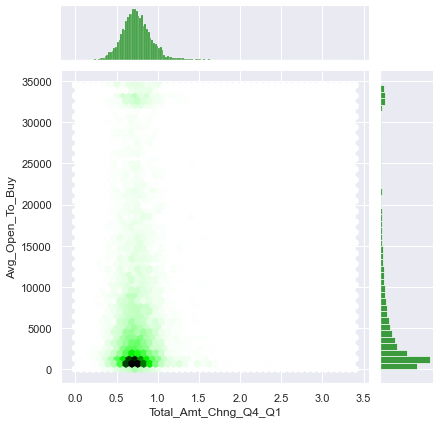

In [30]:
plt.figure(figsize=(12,7))
sns.jointplot(data=df,x="Total_Amt_Chng_Q4_Q1",y="Avg_Open_To_Buy",kind="hex",color="green")

**Observations**
1. For almsot every credit level observation, the amount spent in Q4 is lower than the amount spent in Q1
2.There densest part of the chart seems to indicate that even though spending in Q4 was lower, there was lower amounts left fpr customers to spend

#### Correlation Heatmap

<AxesSubplot:>

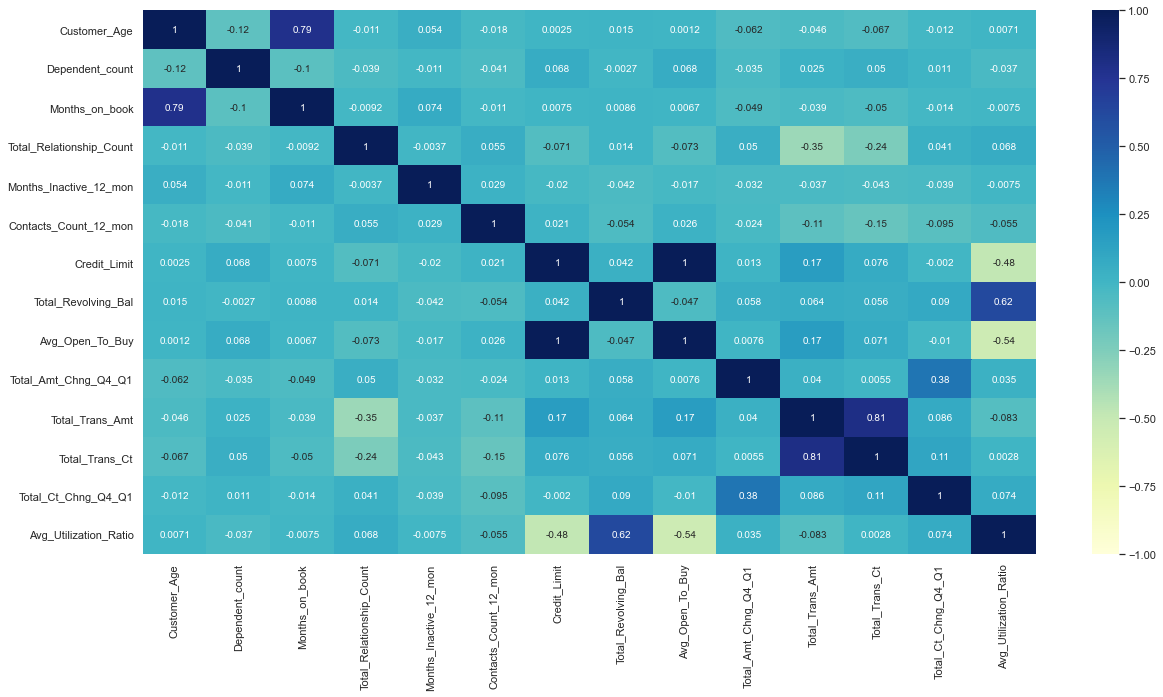

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap="YlGnBu")#creates correlation matrix for all numeric variables

**Observations**
1. Credit Limit and Average Openess to buy are perfectly corellated and hence one must be dropped to reduces chances of multicollinearity
2. Months on Book and Customer Age are positively correlated
3. Total Transaction Amount and Total transaction count are stronlgy positively correlated and hence one must be dropped to reduce multicollinearity

### Customer Profile and Initial Inferences
1. The average customer of Thera Bank is a woman approximately 46 years old and has 2 dependents
2.The average customer has been with Thera Bank for around 3 years and has a credit limit of 4400USD
3. Q4 spending is about 75% of Q1 spending. The bank should look into offering seasonal promotions to drive customer utilization
4. The average customer has 65 transactions in a year amounting to approximately 4400USD in expenditure
5. Most customers of Thera Bank have incomes below the national median
6. An overwhelmingly large number of basic cards indicated Thera Bank might be a credit building institution. To reduce attrition, Thera bank would benefit from offering a wider range of products that would be suitably matched to every segment of their customers' credit building journey

## Data Pre-processing and Feature Engineering

### Dropping Variables to reduce Multicollinearity

In [32]:
df.drop(["Avg_Open_To_Buy"], axis=1, inplace=True)#dropping variable
df.drop(["Total_Trans_Amt"], axis=1, inplace=True)
df.shape

(10127, 18)

### Creating Dummy Target Variable

In [33]:
df['Attrition_Flag'].replace({"Existing Customer":0,"Attrited Customer":1}, inplace=True)#replacing units with respective multipliers
df['Attrition_Flag']=df['Attrition_Flag'].astype('float64')

### Splitting Data into Training, Validation and Testing Sets

In [34]:
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"]

In [35]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=646, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=646, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 17) (2026, 17) (2026, 17)


### Imputing Missing Values
Since the missing values are in categorical variables, we will be imputing them with Mode and performing it first on the training set and then subsequently on validation and test set to avoid data leakage

In [36]:
# To be used for missing value imputation
from sklearn.impute import SimpleImputer


In [37]:
# Let's impute the missing values
impmode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# fit the imputer on train data and transform the train data
X_train["Education_Level"] = impmode.fit_transform(X_train[["Education_Level"]])
X_train["Marital_Status"] = impmode.fit_transform(X_train[["Marital_Status"]])

# transform the validation and test data using the imputer fit on train data
X_val["Education_Level"] = impmode.fit_transform(X_val[["Education_Level"]])
X_val["Marital_Status"] = impmode.fit_transform(X_val[["Marital_Status"]])

X_test["Education_Level"] = impmode.fit_transform(X_test[["Education_Level"]])
X_test["Marital_Status"] = impmode.fit_transform(X_test[["Marital_Status"]])


### Rectifying mislabelled observations in Income_Category

In [38]:
X_train["Income_Category"].unique()#gets all unqiue values for feature

array(['Less than $40K', '$40K - $60K', 'abc', '$120K +', '$80K - $120K',
       '$60K - $80K'], dtype=object)

In [39]:
X_train["Income_Category"].mode()#gets mode of feature

0    Less than $40K
dtype: object

In [40]:
X_train["Income_Category"].replace({"abc":"Less than $40K"},inplace=True)#replace in place

In [41]:
X_val["Income_Category"].unique()

array(['$60K - $80K', 'abc', '$40K - $60K', 'Less than $40K', '$120K +',
       '$80K - $120K'], dtype=object)

In [42]:
X_val["Income_Category"].mode()

0    Less than $40K
dtype: object

In [43]:
X_val["Income_Category"].replace({"abc":"Less than $40K"},inplace=True)

In [44]:
X_test["Income_Category"].mode()

0    Less than $40K
dtype: object

In [45]:
X_test["Income_Category"].unique()

array(['$80K - $120K', 'abc', '$60K - $80K', '$40K - $60K',
       'Less than $40K', '$120K +'], dtype=object)

In [46]:
X_test["Income_Category"].replace({"abc":"Less than $40K"},inplace=True)

### Getting dummies on independent categorical features

In [47]:
X_train = pd.get_dummies(data=X_train,columns=["Gender","Education_Level","Marital_Status","Income_Category","Card_Category"], drop_first=True)#gets dummies for listed variables and drops first category for each
X_val = pd.get_dummies(data=X_val,columns=["Gender","Education_Level","Marital_Status","Income_Category","Card_Category"], drop_first=True)
X_test = pd.get_dummies(data=X_test,columns=["Gender","Education_Level","Marital_Status","Income_Category","Card_Category"], drop_first=True)

Let us check all datsets for consistency

In [48]:
X_test.shape

(2026, 27)

In [49]:
X_train.shape

(6075, 27)

In [50]:
X_val.shape

(2026, 27)

## Model Evaluation Criterion
The Model can predict wrongly in the following ways:
1. Predicting an attrited customer as an existing customer
2. Predicting an existing customer as an attrited customer
**Which misprediction is more important to us?**

By mispredicting an attrited customer as an existing customer, we will lose out on interest payments, fees and surcharges.

This type of error is commonly referred to as a **false negative** error

Hence, we should maximize **recall** to reduce the number of false negatives when building our models

## Model Building and Evaluation

### Importing Relevant Classifier and Model Libraries

In [51]:
from sklearn.linear_model import LogisticRegression#logistic regression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from sklearn import metrics#allows us to get scores
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

In [52]:
#### Grouping models for easier execution

In [53]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=646)))
models.append(("Random forest", RandomForestClassifier(random_state=646)))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=646)))
models.append(("Adaboost", AdaBoostClassifier(random_state=646)))
models.append(("Logistic Regression", LogisticRegression(random_state=646)))
models.append(("dtree", DecisionTreeClassifier(random_state=646)))

results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models
score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=646
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 64.2407116692831
Random forest: 64.96127681841968
Gradient Boost: 68.95918367346938
Adaboost: 70.29042386185243
Logistic Regression: 44.670852956567245
dtree: 67.73050758765045

Validation Performance:

Bagging: 0.6533742331288344
Random forest: 0.6625766871165644
Gradient Boost: 0.7269938650306749
Adaboost: 0.7085889570552147
Logistic Regression: 0.3803680981595092
dtree: 0.7361963190184049


**Observations**
1. On the validation, the best performing model was the Decision Tree Classifier achieving a recall of 73.61%
2. Other models that performed well comparitively were Gradient Boost (72.70%) and the ADABoost Classifier (70.86%)
3. The Logistic Regression Classifier performed the worst in both k-fold Cross Validation and Validation

#### Importing undersampling and oversampling

In [54]:
# To use statistical functions
import scipy.stats as stats

# To oversample and undersample data
!pip install imblearn #python library that stores undersampling and oversampling techniques
from imblearn.over_sampling import SMOTE #used for oversampling
from imblearn.under_sampling import RandomUnderSampler #used for undersampling

### Oversampling data to reduce majority bias

In [55]:
print("Before OverSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=646
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label 'Yes': 976
Before OverSampling, counts of label 'No': 5099 

After OverSampling, counts of label 'Yes': 5099
After OverSampling, counts of label 'No': 5099 

After OverSampling, the shape of train_X: (10198, 27)
After OverSampling, the shape of train_y: (10198,) 



As we can see, we have used the K-nearest neighbour algorithm to increase the frequency of our minority class

### Model Fitting on Oversampled Data

In [56]:
modelsover = []  # Empty list to store all the models

# Appending models into the list
modelsover.append(("Bagging", BaggingClassifier(random_state=646)))
modelsover.append(("Random forest", RandomForestClassifier(random_state=646)))
modelsover.append(("Gradient Boost", GradientBoostingClassifier(random_state=646)))
modelsover.append(("Adaboost", AdaBoostClassifier(random_state=646)))
modelsover.append(("Logistic Regression", LogisticRegression(random_state=646)))
modelsover.append(("dtree", DecisionTreeClassifier(random_state=646)))

resultsover = []  # Empty list to store all model's CV scores
namesover = []  # Empty list to store name of the models
scoreover = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=646
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for nameover, model in modelsover:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scoreover)
    print("{}: {}".format(nameover, scores))


Cross-Validation Performance:

Bagging: 93.21432007542958
Random forest: 95.25392060651544
Gradient Boost: 94.13600415632398
Adaboost: 93.25359348842579
Logistic Regression: 81.15293732802246
dtree: 92.50839923800727

Validation Performance:

Bagging: 0.6993865030674846
Random forest: 0.7239263803680982
Gradient Boost: 0.7852760736196319
Adaboost: 0.7423312883435583
Logistic Regression: 0.7024539877300614
dtree: 0.7208588957055214


**Observations**
1. While recall for all models improved, the Gradient Boost classifier continued to remain the strongest increasing to validation recall of 78.53%
2. ADABoost and the Decision Tree classifier continued to be the second and third strongest in terms of recall respectively

### Creating Undersampled Dataset

In [57]:
rus = RandomUnderSampler(random_state=646)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 976
Before Under Sampling, counts of label 'No': 5099 

After Under Sampling, counts of label 'Yes': 976
After Under Sampling, counts of label 'No': 976 

After Under Sampling, the shape of train_X: (1952, 27)
After Under Sampling, the shape of train_y: (1952,) 



As we can see, the majority class has been reduced to the size of the minority class

### Building and evaluating models on undersampled dataset

In [58]:
modelsunder = []  # Empty list to store all the models

# Appending models into the list
modelsunder.append(("Bagging", BaggingClassifier(random_state=646)))
modelsunder.append(("Random forest", RandomForestClassifier(random_state=646)))
modelsunder.append(("Gradient Boost", GradientBoostingClassifier(random_state=646)))
modelsunder.append(("Adaboost", AdaBoostClassifier(random_state=646)))
modelsunder.append(("Logistic Regression", LogisticRegression(random_state=646)))
modelsunder.append(("dtree", DecisionTreeClassifier(random_state=646)))

results2 = []  # Empty list to store all model's CV scores
names2 = []  # Empty list to store name of the models
score2 = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=646
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    score.append(scores)
    print("{}: {}".format(name, scores))


Cross-Validation Performance:

Bagging: 82.78231292517006
Random forest: 87.08634222919936
Gradient Boost: 89.33908948194663
Adaboost: 86.98639455782313
Logistic Regression: 79.81266352694924
dtree: 81.65881737310308

Validation Performance:

Bagging: 0.8926380368098159
Random forest: 0.9049079754601227
Gradient Boost: 0.911042944785276
Adaboost: 0.8558282208588958
Logistic Regression: 0.7914110429447853
dtree: 0.8619631901840491


**Observations**
1. On the validation set, Gradient Boost continued to be the strongest in terms of Recall rising to a validation recall of 91.10%
2. However, the second strongest was Random Forest at 87.09% followed by the Bagging estimator at 89.26%
3. This jump in performance is to be expected as both the Random forest and Bagging estimator heavily favor the dominant class

## Hyperparameter Tuning

### Choosing models to be tuned
Overall, Decision Tree, Gradient Boosting and ADABoost Classifers performed consistently well through all 18 model runs. 

The best performing versions of these models were with under sampled data and hence for the purposes of hyper parameter tuning, we will be using the undersampled dataset.

Let us import Hyperparameter tuning libraries

In [59]:
# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

### Defining functions to create Confusion Matrix and get Model scores

In [60]:
def model_performance_classification_sklearn(model, predictors, target):#function for getting metrics from sklearn metrics
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [61]:
def confusion_matrix_sklearn(model, predictors, target):#building confusion matrix
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree estimator

In [78]:
dtree = DecisionTreeClassifier(criterion='gini',random_state=646)#fitting model
dtree.fit(X_train_un,y_train_un)

DecisionTreeClassifier(random_state=646)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Valiation performance:
    Accuracy    Recall  Precision        F1
0  0.826752  0.861963   0.478705  0.615553
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.818855  0.852308   0.464765  0.60152


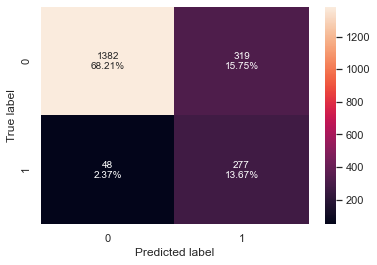

In [79]:
dtree_model_train_perf=model_performance_classification_sklearn(dtree,X_train_un,y_train_un)#calculating model metrics
print("Training performance:\n",dtree_model_train_perf)
dtree_model_val_perf=model_performance_classification_sklearn(dtree,X_val,y_val)#calculating model metrics
print("Valiation performance:\n",dtree_model_val_perf)
dtree_model_test_perf=model_performance_classification_sklearn(dtree,X_test,y_test)
print("Testing performance:\n",dtree_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(dtree, X_test, y_test)

**Observations**
1. As is the case with an unchecked desicion tree, it grows until all observations have been correctly classified
2. This leads to overfitting on the training set and underfitting on the validation and testing sets
3. The base decision tree model had an out of sample recall of 85.23%

#### Tuning Desicion Tree

In [80]:
# Creating pipeline
model = DecisionTreeClassifier(random_state=646)

# Parameter grid to pass in RandomizedSearchCV
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 4, 5,6,7,8, 9,None],
    "min_samples_split": [2, 4, 7, 10, 15],
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=40,
    scoring=scorer,
    cv=5,
    random_state=646,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_val, y_val)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'min_samples_split': 4, 'max_depth': 9, 'criterion': 'entropy'} with CV score=0.6656410256410257:


On fitting the model we have:

In [105]:
dtree2 = DecisionTreeClassifier(criterion='entropy', min_samples_split=4, max_depth=9, random_state=646)#fitting model
dtree2.fit(X_train_un,y_train_un)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_split=4,
                       random_state=646)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.943648  0.964139   0.926181  0.944779
Valiation performance:
    Accuracy    Recall  Precision        F1
0  0.817374  0.880368   0.464401  0.608051
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.806515  0.852308   0.446055  0.585624


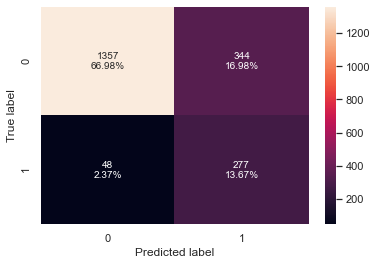

In [106]:
dtree2_model_train_perf=model_performance_classification_sklearn(dtree2,X_train_un,y_train_un)#calculating model metrics
print("Training performance:\n",dtree2_model_train_perf)
dtree2_model_val_perf=model_performance_classification_sklearn(dtree2,X_val,y_val)#calculating model metrics
print("Valiation performance:\n",dtree2_model_val_perf)
dtree2_model_test_perf=model_performance_classification_sklearn(dtree2,X_test,y_test)
print("Testing performance:\n",dtree2_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(dtree2, X_test, y_test)

**Observations**
1. While our test recall stayed identical, our model is now less overfit due to the decrease in training data recall
2. Looking at the confusion matrix, we have 48 false neagtives
Let us now look at feature importances:

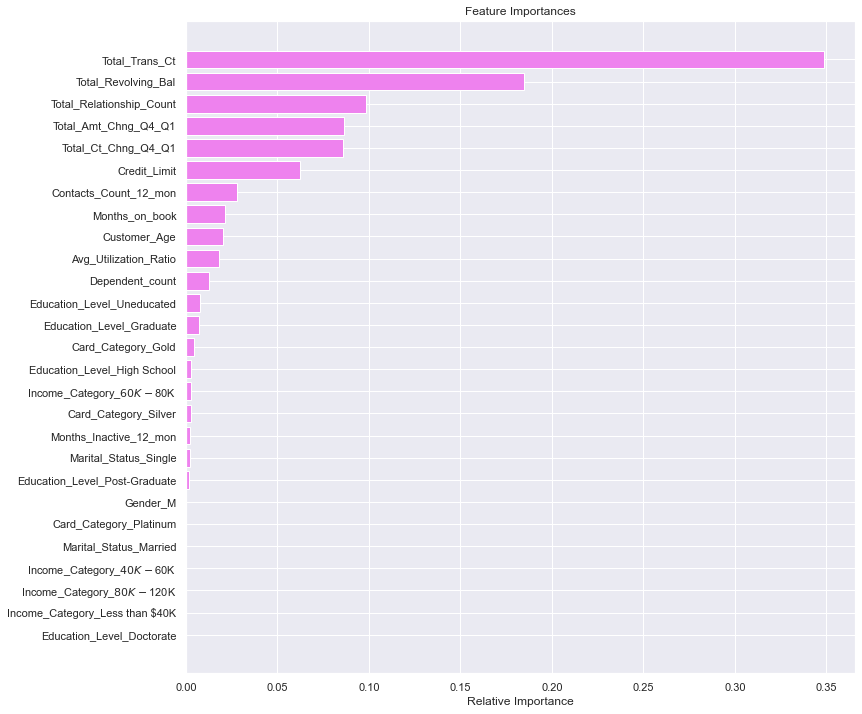

In [95]:
feature_names = X_train_un.columns
importances = dtree2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observations**
1. Total Transaction Count is by far the most important feature. This implies that by driving higher usage through frequency based fee structures could reduce customer attrition
2. Total Revolving Balance is another important feature and hence the bank must maintain better relationships with those customers
3. The third most important feature is the total number of relationships. Hence, the bank must focus on increased customer adoption of a mutlitude of products to increase reliance and reduce likelihood of attrition
4. Other important features include Total Count Change Q4/Q1, Credit Limit, Customer Age, Men and those with higher tiered cards

### ADABoost Classifier

Fitting the classifier:

In [84]:
ada = AdaBoostClassifier(random_state=646)
ada.fit(X_train_un,y_train_un)

AdaBoostClassifier(random_state=646)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.894467  0.900615   0.889676  0.895112
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.873643  0.855828   0.571721  0.685504
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.872655  0.901538   0.564547  0.694313


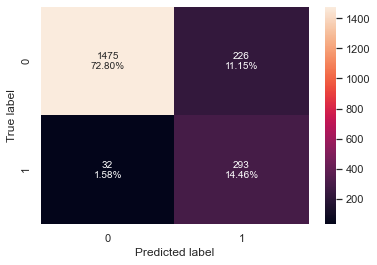

In [85]:
#Calculating different metrics
ada_model_train_perf=model_performance_classification_sklearn(ada,X_train_un,y_train_un)
print("Training performance:\n",ada_model_train_perf)
ada_model_val_perf=model_performance_classification_sklearn(ada,X_val,y_val)
print("Validation performance:\n",ada_model_val_perf)
ada_model_test_perf=model_performance_classification_sklearn(ada,X_test,y_test)
print("Testing performance:\n",ada_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(ada, X_test, y_test)

**Observations**
1. The ADABoost classifier performed better than the tuned decision tree in terms of recall scoring at at a test recall of 90.15%
2. Looking at the confusion matrix, 32 attrited customers were incorrectly predicted as existing customers

#### Tuning ADABoost

In [86]:
model1 = AdaBoostClassifier(random_state=646)#choosing classifier

param_grid = {
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=646),DecisionTreeClassifier(max_depth=2, random_state=646),DecisionTreeClassifier(max_depth=3, random_state=646)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}#trying parameters
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model1,
    param_distributions=param_grid,
    n_iter=20,
    scoring=scorer,
    cv=5,
    random_state=646,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_val, y_val)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)


Best parameters are {'n_estimators': 90, 'learning_rate': 1.5000000000000002, 'base_estimator': DecisionTreeClassifier(max_depth=1, random_state=646)} with CV score=0.6960839160839161:


### Running Tuned ADABoost with hyperparameters

In [87]:
ada_tuned=AdaBoostClassifier(n_estimators=90, learning_rate=1.5000000000000002, base_estimator=DecisionTreeClassifier(max_depth=1, random_state=646),random_state=646)
ada_tuned.fit(X_train_un,y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1,
                                                         random_state=646),
                   learning_rate=1.5000000000000002, n_estimators=90,
                   random_state=646)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.905225  0.906762   0.903984  0.905371
Validation performance:
    Accuracy    Recall  Precision       F1
0  0.858342  0.849693   0.537864  0.65874
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.858835  0.910769   0.535262  0.67426


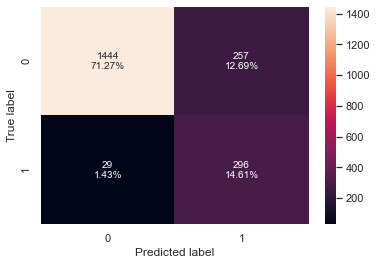

In [88]:
#Calculating different metrics
ada1_model_train_perf=model_performance_classification_sklearn(ada_tuned,X_train_un,y_train_un)
print("Training performance:\n",ada1_model_train_perf)
ada1_model_val_perf=model_performance_classification_sklearn(ada_tuned,X_val,y_val)
print("Validation performance:\n",ada1_model_val_perf)
ada1_model_test_perf=model_performance_classification_sklearn(ada_tuned,X_test,y_test)
print("Testing performance:\n",ada1_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(ada_tuned, X_test, y_test)

**Observations**
1. The out of sample recall increased slightly to 91.07%
2. The number of incorrectly predicted attriters decreased from 32 to 29

### Gradient Boosting

Fitting the model

In [100]:
gradient = GradientBoostingClassifier(random_state=646)
gradient.fit(X_train_un,y_train_un)

GradientBoostingClassifier(random_state=646)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.935451  0.931352    0.93905  0.935185
Validation performance:
    Accuracy    Recall  Precision        F1
0  0.903751  0.911043   0.641469  0.752852
Testing performance:
    Accuracy    Recall  Precision     F1
0  0.903258  0.929231   0.635789  0.755


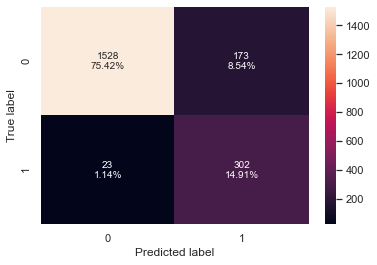

In [101]:
#Calculating different metrics
gradient_model_train_perf=model_performance_classification_sklearn(gradient,X_train_un,y_train_un)
print("Training performance:\n",gradient_model_train_perf)
gradient_model_val_perf=model_performance_classification_sklearn(gradient,X_val,y_val)
print("Validation performance:\n",gradient_model_val_perf)
gradient_model_test_perf=model_performance_classification_sklearn(gradient,X_test,y_test)
print("Testing performance:\n",gradient_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(gradient, X_test, y_test)

**Observations**
1. The test recall for the Gradient Boost model was 92.92%
2. The number of incorrectly attriters was 23

#### Tuning Gradient Boost

In [102]:
model2 = GradientBoostingClassifier(random_state=646)#choosing classifier
param_grid = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}
# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)
# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model2,
    param_distributions=param_grid,
    n_iter=55,
    scoring=scorer,
    cv=5,
    random_state=646,
)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_val, y_val)

print(
    "Best parameters are {} with CV score={}:".format(
        randomized_cv.best_params_, randomized_cv.best_score_
    )
)

Best parameters are {'subsample': 0.8, 'n_estimators': 250, 'max_features': 0.7} with CV score=0.7024708624708624:


In [107]:
gradient1 = GradientBoostingClassifier(subsample=0.8,n_estimators=250,max_features=0.7,random_state=646)
gradient1.fit(X_train_un,y_train_un)

GradientBoostingClassifier(max_features=0.7, n_estimators=250, random_state=646,
                           subsample=0.8)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.981045  0.97541   0.986528  0.980938
Validation performance:
    Accuracy    Recall  Precision       F1
0  0.908687  0.904908   0.657016  0.76129
Testing performance:
    Accuracy    Recall  Precision      F1
0   0.90227  0.926154   0.633684  0.7525


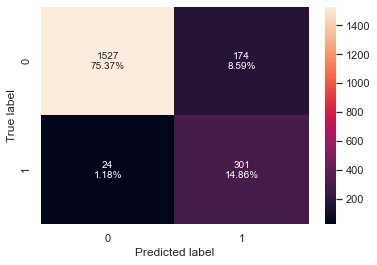

In [108]:
#Calculating different metrics
gradient1_model_train_perf=model_performance_classification_sklearn(gradient1,X_train_un,y_train_un)
print("Training performance:\n",gradient1_model_train_perf)
gradient1_model_val_perf=model_performance_classification_sklearn(gradient1,X_val,y_val)
print("Validation performance:\n",gradient1_model_val_perf)
gradient1_model_test_perf=model_performance_classification_sklearn(gradient1,X_test,y_test)
print("Testing performance:\n",gradient1_model_test_perf)
#Creating confusion matrix
confusion_matrix_sklearn(gradient1, X_test, y_test)

**Observations**
1. Test recall decreased slightly
2. However, this is a cross validated model which gives the highest recall and should be used in production

## Comparing Final Results

In [110]:
model_test_comp_df=pd.concat(
[dtree_model_test_perf.T,dtree2_model_test_perf.T,ada_model_test_perf.T,ada1_model_test_perf.T,gradient_model_test_perf.T,gradient1_model_test_perf.T],
axis=1,
)
model_test_comp_df.columns=[
    "Decision Tree with Undersampled Data",
    "Tuned Decision Tree with Undersampled Data",
    "ADA Boost with Undersampled Data",
    "Tuned ADA Boost with Undersampled Data",
    "Gradient Boost with Undersampled Data",
    "Tuned Gradient Boost with Undersampled Data"
]
print("Testing performance comparison")
model_test_comp_df

Testing performance comparison


Decision Tree with Undersampled Data  \
Accuracy                               0.818855   
Recall                                 0.852308   
Precision                              0.464765   
F1                                     0.601520   

           Tuned Decision Tree with Undersampled Data  \
Accuracy                                     0.806515   
Recall                                       0.852308   
Precision                                    0.446055   
F1                                           0.585624   

           ADA Boost with Undersampled Data  \
Accuracy                           0.872655   
Recall                             0.901538   
Precision                          0.564547   
F1                                 0.694313   

           Tuned ADA Boost with Undersampled Data  \
Accuracy                                 0.858835   
Recall                                   0.910769   
Precision                                0.535262   
F1                                       0.674260   

           Gradient Boost with Undersampled Data  \
Accuracy                                0.903258   
Recall                                  0.929231   
Precision                               0.635789   
F1                                      0.755000   

           Tuned Gradient Boost with Undersampled Data  
Accuracy                                      0.902270  
Recall                                        0.926154  
Precision                                     0.633684  
F1                                            0.752500

- In terms of maximizing recall, the Graident Boost classifier performed the best
- For all models precision suffered when we maximized recall
-For all metrics the Gradient Boost classifier performed the best attaining an out of sample accuracy of 90.3%

## Key Takeaways and Actionable Insights
- We have been able to successfuly create a model that can predict whether a customer is about to atritte.
- The most important factor in customer attrition is Total Transactions
    - This is primarily because the probablility of attrition reduces when reliance on the product increases
    - The bank should implement strategies such as a use based fee structure to increase transaction counts and reduce attrition
- The ratio of Q4:Q1 spending is another important factor contributing to attrition
    - In Q4, the average customer only spends 75% compared to their Q1 expenditure
    - To increase the likelihood of customer retention, the bank should impliment cashback, special rewards or discount programs during Q4
- The bank should also focus on promoting new products to its existing customers to become an end to end solutions provider for their financial needs as Total Relationships is another important factor in customer attrition
- Women are the most common customer type for Thera Bank and the bank should promote heavily to women to gain and retain customers
- The median customer is 46 years old with two dependents implying most likely customers are parents with children. The bank should target these customers with products such as a College Savings account to boost retention.
- Most customer attrition occurs after 2-4 months of inactivity and hence the bank should increase communication in those months to reduce attrition
- However, higher communication levels seem to be associated with higher customer attrition implying a lack of effectiveness in the banks current outreach strateg. The bank should analyze its current strategy to optimize future customer interactions and reduce attrition